# Sampling Bias in Action: The Literary Digest and The 1936 Presidential Election

Project by Matthew Lim 

Data Sources: 
https://www.randomservices.org/random/data/LiteraryDigest.html,
https://www.presidency.ucsb.edu/statistics/elections/1936

## Import Libraries

In [3]:
import numpy as np # Linear algebra library
import pandas as pd # Data preprocessing library
import matplotlib.pyplot as plt # Data visualization library

## Data Preprocessing & Exploratory Data Analysis

### The Literary Digest Sample

The table below gives the results of a poll published by The Literary Digest magazine on 31 October 1936 (Halloween, appropriately enough), shortly before the 1936 presidential election. The candidates were Franklin Delano Roosevelt (the incumbent president, a democrat) and Alfred (Alf) Mossman Landon (the republican challenger, then governor of Kansas). Approximately 10,000,000 questionnaires (in the form of postcards) were mailed to prospective voters, making the Literary Digest poll one of the largest ever conducted. Approximately 2,300,000 (less than 25%) were returned. The prospective voters were chosen from the subscription list of the magazine, from automobile registration lists, from phone lists, and from club membership lists.

In the data table, the results are given by state. There were 48 states in 1936 (Alaska and Hawaii were admitted in 1959, respectively, as the 49th and 50th states of the Union). For each state, the table gives the number of electoral votes, the number of votes for Landon in the poll, and the number of votes for Roosevelt in the poll.

In [4]:
literary_digest_poll = pd.read_table('data/1936_election/LiteraryDigest.tsv',sep='\t')
literary_digest_poll.head()

,State,EV,AML,FDR
0,AL,11,3060,10082
1,AZ,3,2337,1975
2,AR,9,2724,7608
3,CA,22,89516,7608
4,CO,6,15949,10025


In [5]:
literary_digest_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   49 non-null     object
 1   EV      49 non-null     int64 
 2   AML     49 non-null     int64 
 3   FDR     49 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
literary_digest_poll.describe()

,EV,AML,FDR
count,49.00000,49.000000,49.000000
mean,11.22449,26123.285714,17751.530612
std,8.89116,36131.797539,24458.163552
min,3.00000,848.000000,545.000000
25%,5.00000,3686.000000,4507.000000
50%,9.00000,10401.000000,10235.000000
75%,13.00000,31871.000000,19829.000000
max,47.00000,162260.000000,139277.000000


In [7]:
ld_poll_states = literary_digest_poll['State']
ld_poll_landon = literary_digest_poll['AML']
ld_poll_roosevelt = literary_digest_poll['FDR']

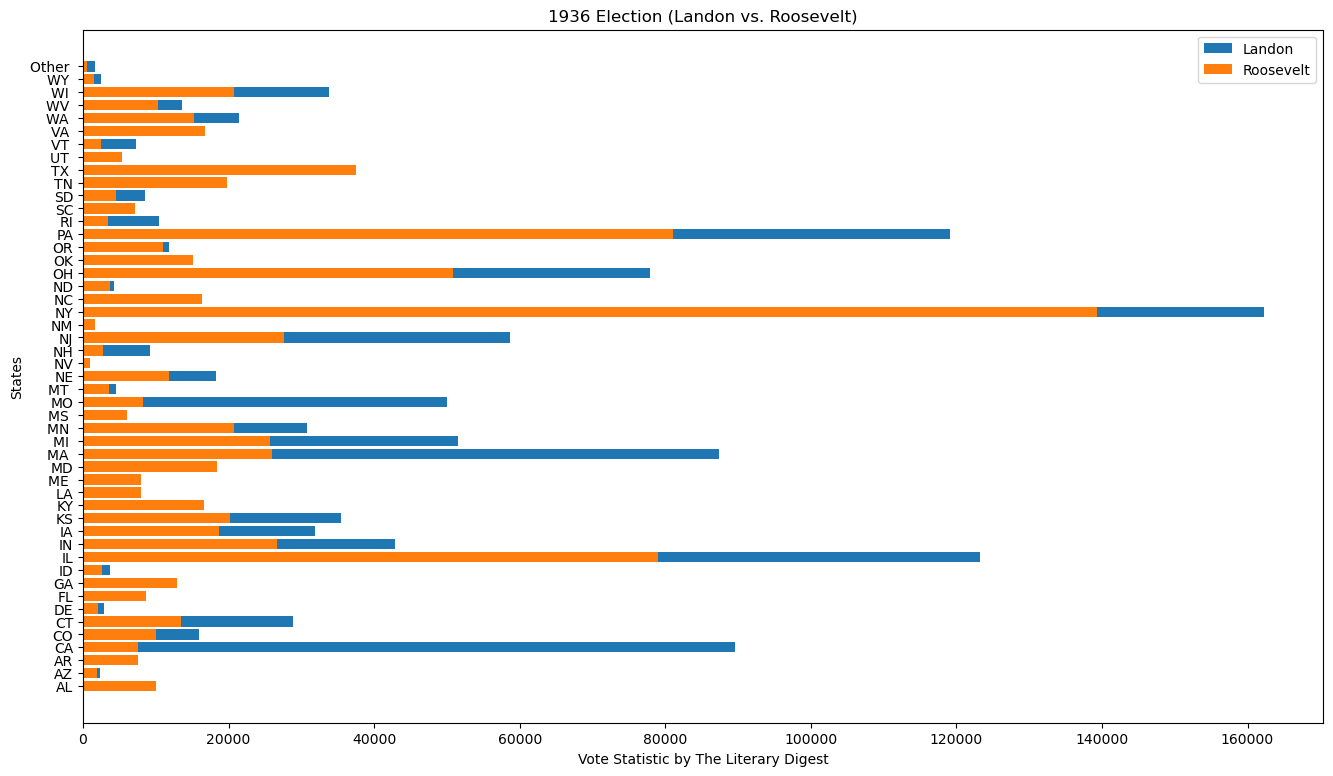

In [8]:
fig, ax = plt.subplots(figsize =(16, 9))
p1 = plt.barh(ld_poll_states, ld_poll_landon)
p2 = plt.barh(ld_poll_states, ld_poll_roosevelt)

plt.xlabel('Vote Statistic by The Literary Digest')
plt.ylabel('States')
plt.title('1936 Election (Landon vs. Roosevelt)')
plt.legend((p1[0], p2[0]), ('Landon', 'Roosevelt'))

Here, we can clearly see that, according The Literary Digest, Landon is the projected winner based on prospective voters in each state.

In [9]:
ld_landon_total = ld_poll_landon[:].sum()
ld_roosevelt_total = ld_poll_roosevelt[:].sum()
ld_total_difference = abs(ld_landon_total - ld_roosevelt_total)
print('Landon Total: ' + str(ld_landon_total))
print('Roosevelt Total: ' + str(ld_roosevelt_total))
print('Total Difference in Votes: ' + str(ld_total_difference))

Landon Total: 1280041
Roosevelt Total: 869825
Total Difference in Votes: 410216


### Now, let's take a look at the actual results from the 1936 Presidential Election

#### Data Scraping 1936 Presidential Election Results Dataset

In [10]:
# Scraping data from UCSB website... an essential tool for data science / machine learning projects
import requests
from bs4 import BeautifulSoup

In [11]:
# Create an URL object for 1936 Presidential Election Statistics
url = 'https://www.presidency.ucsb.edu/statistics/elections/1936'
# Create object page
page = requests.get(url)

In [12]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
#soup

In [13]:
# Obtain information from tag <table>
table1 = soup.find('table')
# table1

In [14]:
cols = pd.MultiIndex.from_tuples([("", "State"),
                                  ("", "Total Vote"),
                                  ("FDR", "Votes"), 
                                  ("FDR", "%"), 
                                  ("FDR", "EV"), 
                                  ("AML", "Votes"),
                                  ("AML", "%"),
                                  ("AML", "EV")])
election_poll = pd.DataFrame(columns=cols)
election_poll

Empty DataFrame
Columns: [(, State), (, Total Vote), (FDR, Votes), (FDR, %), (FDR, EV), (AML, Votes), (AML, %), (AML, EV)]
Index: []

In [15]:
# Create a for loop to fill election_poll
for j in table1.find_all('tr')[9:-2]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(election_poll)
 election_poll.loc[length] = row

In [16]:
election_poll.head()

FDR                AML         
        State Total Vote      Votes     %  EV    Votes     % EV
0     Alabama    275,744    238,196  86.4  11   35,358  12.8   
1     Arizona    124,163     86,722  69.8   3   33,433  26.9   
2    Arkansas    179,431    146,765  81.8   9   32,049  17.9   
3  California  2,638,882  1,766,836  67.0  22  836,431  31.7   
4    Colorado    488,685    295,021  60.4   6  181,267  37.1

#### Data Cleaning to Fix Graphical Error

An error that I've been trying to fix was the horizontal bar graph not displaying correctly based on the data. I quickly came to realize that the problem was because of the data formatting itself. The problem is recreated below.

In [17]:
election_states = election_poll['']['State']
election_landon = election_poll['AML']['Votes']
election_roosevelt = election_poll['FDR']['Votes']

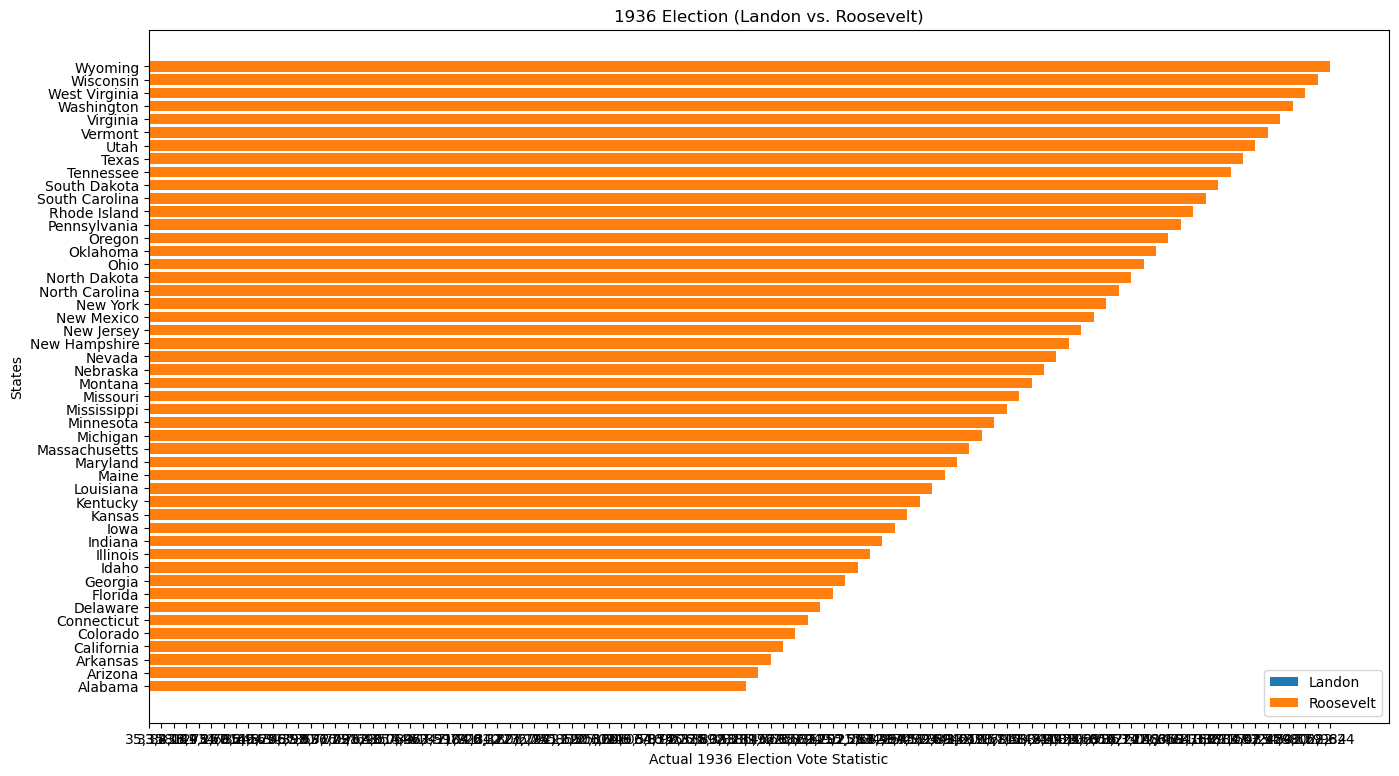

In [18]:
fig, ax = plt.subplots(figsize =(16, 9))
p1 = plt.barh(election_states, election_landon)
p2 = plt.barh(election_states, election_roosevelt)

plt.xlabel('Actual 1936 Election Vote Statistic')
plt.ylabel('States')
plt.title('1936 Election (Landon vs. Roosevelt)')
plt.legend((p1[0], p2[0]), ('Landon', 'Roosevelt'))

#### Solution

In [19]:
# Remove commas from dataframe
election_poll = election_poll.apply(lambda x: x.str.replace(',', ''))
# Convert to int64 from str (fix in next cell)
print(election_poll.dtypes)

     State         object
     Total Vote    object
FDR  Votes         object
     %             object
     EV            object
AML  Votes         object
     %             object
     EV            object
dtype: object


In [20]:
election_states = election_poll['']['State']
election_landon = election_poll['AML']['Votes'].apply(lambda x: int(x)) # Solution was to set variable to mutated dataframe column
election_roosevelt = election_poll['FDR']['Votes'].apply(lambda x: int(x)) # Solution was to set variable to mutated dataframe column

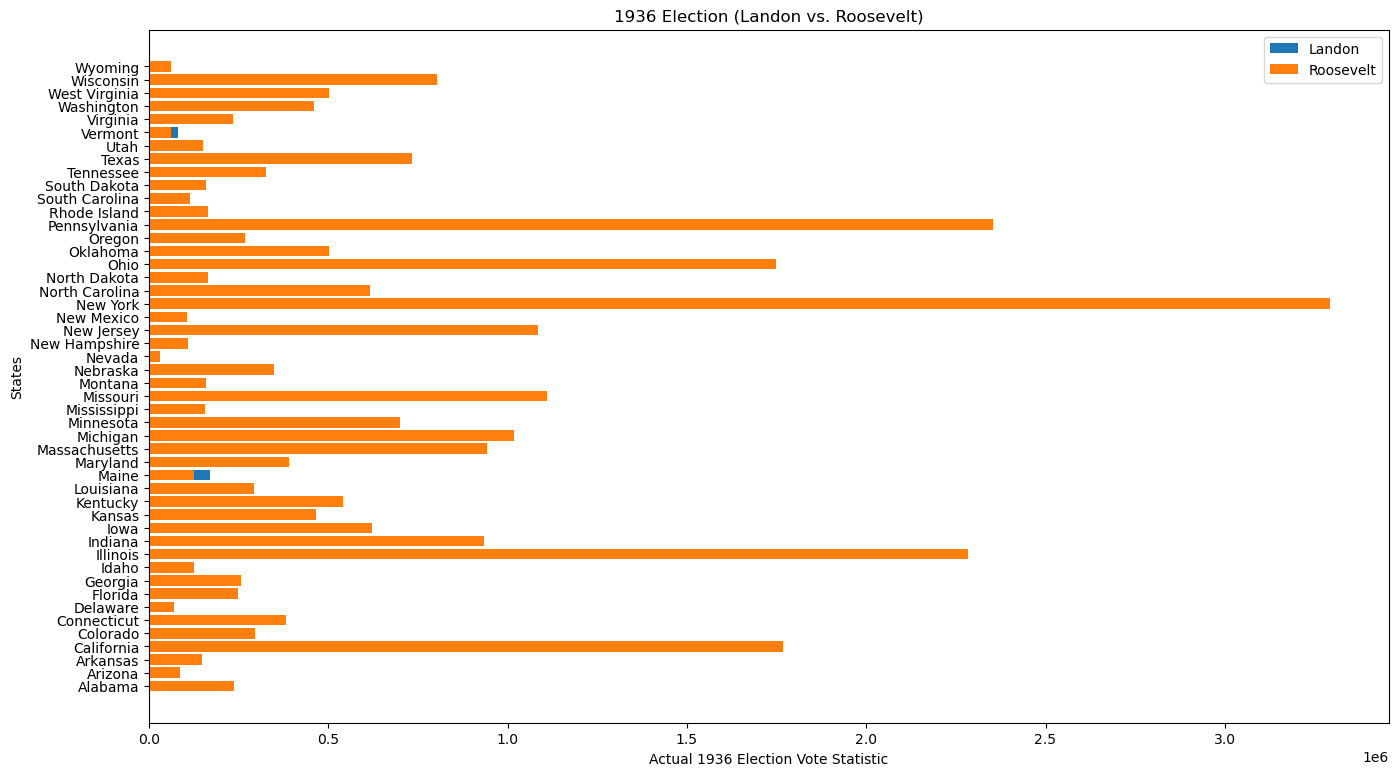

In [21]:
fig, ax = plt.subplots(figsize =(16, 9))
p1 = plt.barh(election_states, election_landon)
p2 = plt.barh(election_states, election_roosevelt)

plt.xlabel('Actual 1936 Election Vote Statistic')
plt.ylabel('States')
plt.title('1936 Election (Landon vs. Roosevelt)')
plt.legend((p1[0], p2[0]), ('Landon', 'Roosevelt'))

In this graph, it is evident that Roosevelt has won the 1936 Presidential Election by a landslide, thereby disproving the sample poll results and hurting the repution of The Literary Digest. 

In [22]:
election_landon_total = election_landon[:].sum()
election_roosevelt_total = election_roosevelt[:].sum()
election_total_difference = abs(election_landon_total - election_roosevelt_total)
print('Landon Total: ' + str(election_landon_total))
print('Roosevelt Total: ' + str(election_roosevelt_total))
print('Total Difference in Votes: ' + str(election_total_difference))

Landon Total: 16679683
Roosevelt Total: 27750866
Total Difference in Votes: 11071183


## Conclusion

Based on the poll, The Literary Digest predicted that Landon would win the 1936 presidential election with 57.1% of the popular vote and an electoral college margin of 370 to 161. In fact, Roosevelt won the election with 60.8% of the popular vote (27,751,841 to 16,679,491) and an electoral college landslide of 523 to 8 (the largest ever in a presidential election). Roosevelt won 46 of 48 states, losing only Maine and Vermont.

The Literary Digest, using similar techniques, had correctly predicted the outcome of the last four presidential elections. But in this case, the magazine was not just wrong, it was spectacularly wrong. In part because of the subsequent loss of prestige and credibility, the magazine died just two years later.

What went wrong? Clearly the sample was skewed towards wealthier voters—those who could afford magazine subscriptions, cars, phones, and club memberships in the depths of the Great Depression. This sort of bias would not matter if wealthier voters behaved in a similar manner to voters as a whole (as was basically the case in the previous four elections). But in 1936, at a time of great tension between economic classes, this was definitely not the case.

Another problem, not easily understood, is self-selection bias. Were the voters who chose to return the questionnaires different, in terms of how they planned to vote, from the voters who did not respond?